# Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn import cluster
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load

In [2]:
data_path = "../dataset/data.csv"
non_relevant_cols = ['Photo', 'Club Logo', 'Flag', 'ID', 'Real Face']
data = pd.read_csv(data_path, index_col=0).drop(non_relevant_cols, axis=1)

In [3]:
data

Name  Age Nationality  Overall  Potential  \
0                L. Messi   31   Argentina       94         94   
1       Cristiano Ronaldo   33    Portugal       94         94   
2               Neymar Jr   26      Brazil       92         93   
3                  De Gea   27       Spain       91         93   
4            K. De Bruyne   27     Belgium       91         92   
...                   ...  ...         ...      ...        ...   
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     England       46         66   

                      Club    Value   Wage  Special Preferred Foot  \
0             FC Barcelona  €110.5M  €565K     2202           Left   
1                 Juventus     €77M  €405K     2228          Right   
2      Paris Saint-Germain  €118.5M  €290K     2143          Right   
3        Manchester United     €72M  €260K     1471          Right   
4          Manchester City    €102M  €355K     2281          Right   
...                    ...      ...    ...      ...            ...   
18202      Crewe Alexandra     €60K    €1K     1307          Right   
18203       Trelleborgs FF     €60K    €1K     1098          Right   
18204     Cambridge United     €60K    €1K     1189          Right   
18205      Tranmere Rovers     €60K    €1K     1228          Right   
18206      Tranmere Rovers     €60K    €1K     1321          Right   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
0                           5.0        4.0          4.0  Medium/ Medium   
1                           5.0        4.0          5.0       High/ Low   
2                           5.0        5.0          5.0    High/ Medium   
3                           4.0        3.0          1.0  Medium/ Medium   
4                           4.0        5.0          4.0      High/ High   
...                         ...        ...          ...             ...   
18202                       1.0        2.0          2.0  Medium/ Medium   
18203                       1.0        2.0          2.0  Medium/ Medium   
18204                       1.0        3.0          2.0  Medium/ Medium   
18205                       1.0        3.0          2.0  Medium/ Medium   
18206                       1.0        3.0          2.0  Medium/ Medium   

        Body Type Position  Jersey Number        Joined Loaned From  \
0           Messi       RF           10.0   Jul 1, 2004         NaN   
1      C. Ronaldo       ST            7.0  Jul 10, 2018         NaN   
2          Neymar       LW           10.0   Aug 3, 2017         NaN   
3            Lean       GK            1.0   Jul 1, 2011         NaN   
4          Normal      RCM            7.0  Aug 30, 2015         NaN   
...           ...      ...            ...           ...         ...   
18202        Lean       CM           22.0   May 3, 2017         NaN   
18203      Normal       ST           21.0  Mar 19, 2018         NaN   
18204      Normal       ST           33.0   Jul 1, 2017         NaN   
18205        Lean       RW           34.0  Apr 24, 2018         NaN   
18206        Lean       CM           33.0  Oct 30, 2018         NaN   

      Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF  \
0                     2021    5'7  159lbs  88+2  88+2  88+2  92+2  93+2  93+2   
1                     2022    6'2  183lbs  91+3  91+3  91+3  89+3  90+3  90+3   
2                     2022    5'9  150lbs  84+3  84+3  84+3  89+3  89+3  89+3   
3                     2020    6'4  168lbs   NaN   NaN   NaN   NaN   NaN   NaN   
4                     2023   5'11  154lbs  82+3  82+3  82+3  87+3  87+3  87+3   
...                    ...    ...     ...   ...   ...   ...   ...   ...   ...   
18202                 2019    5'9  134lbs  42+2  42+2  42+2  44+2 

# Infos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [5]:
# used for latex
# for i in range(0, len(data.columns), 2):
#     l1 = data.columns[i] + " & " + str(data[data.columns[i]].isnull().sum()) + " & " + str(data[data.columns[i]].dtype)
#     if i+1 < len(data.columns):
#         l2 = data.columns[i+1] + " & " + str(data[data.columns[i+1]].isnull().sum()) + " & " + str(data[data.columns[i+1]].dtype)
#     else:
#         l2 = ""
#     print(l1 + " & " + l2 + " \\\\")
#     print("\hline")

In [6]:
data.describe(include='all')

Name           Age Nationality       Overall     Potential  \
count          18207  18207.000000       18207  18207.000000  18207.000000   
unique         17194           NaN         164           NaN           NaN   
top     J. Rodríguez           NaN     England           NaN           NaN   
freq              11           NaN        1662           NaN           NaN   
mean             NaN     25.122206         NaN     66.238699     71.307299   
std              NaN      4.669943         NaN      6.908930      6.136496   
min              NaN     16.000000         NaN     46.000000     48.000000   
25%              NaN     21.000000         NaN     62.000000     67.000000   
50%              NaN     25.000000         NaN     66.000000     71.000000   
75%              NaN     28.000000         NaN     71.000000     75.000000   
max              NaN     45.000000         NaN     94.000000     95.000000   

             Club  Value   Wage       Special Preferred Foot  \
count       17966  18207  18207  18207.000000          18159   
unique        651    217    144           NaN              2   
top     Frosinone  €1.1M    €1K           NaN          Right   
freq           33    431   4900           NaN          13948   
mean          NaN    NaN    NaN   1597.809908            NaN   
std           NaN    NaN    NaN    272.586016            NaN   
min           NaN    NaN    NaN    731.000000            NaN   
25%           NaN    NaN    NaN   1457.000000            NaN   
50%           NaN    NaN    NaN   1635.000000            NaN   
75%           NaN    NaN    NaN   1787.000000            NaN   
max           NaN    NaN    NaN   2346.000000            NaN   

        International Reputation     Weak Foot   Skill Moves       Work Rate  \
count               18159.000000  18159.000000  18159.000000           18159   
unique                       NaN           NaN           NaN               9   
top                          NaN           NaN           NaN  Medium/ Medium   
freq                         NaN           NaN           NaN            9810   
mean                    1.113222      2.947299      2.361308             NaN   
std                     0.394031      0.660456      0.756164             NaN   
min                     1.000000      1.000000      1.000000             NaN   
25%                     1.000000      3.000000      2.000000             NaN   
50%                     1.000000      3.000000      2.000000             NaN   
75%                     1.000000      3.000000      3.000000             NaN   
max                     5.000000      5.000000      5.000000             NaN   

       Body Type Position  Jersey Number       Joined Loaned From  \
count      18159    18147   18147.000000        16654        1264   
unique        10       27            NaN         1736         341   
top       Normal       ST            NaN  Jul 1, 2018    Atalanta   
freq       10595     2152            NaN         1538          20   
mean         NaN      NaN      19.546096          NaN         NaN   
std          NaN      NaN      15.947765          NaN         NaN   
min          NaN      NaN       1.000000          NaN         NaN   
25%          NaN      NaN       8.000000          NaN         NaN   
50%          NaN      NaN      17.000000          NaN         NaN   
75%          NaN      NaN      26.000000          NaN         NaN   
max          NaN      NaN      99.000000          NaN         NaN   

       Contract Valid Until Height  Weight     LS     ST     RS     LW     LF  \
count                 17918  18159   18159  16122  16122  16122  16122  16122   
unique                   36     21      57     93     93     93    105    102   
top                    2019    6'0  165lbs   61+2   61+2   61+2   63+2   61+2   
freq                   4819   2881    1483    705    705    705    745    713   
mean                    NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN   
std                     NaN    NaN

# Data Cleaning (use -1 as sentinel)

### Numerical variables

In [3]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Jersey Number'].fillna(-1, inplace = True)
data['Release Clause'].fillna(-1, inplace = True)

### Discrete variables

In [4]:
data['Wage'].fillna(-1, inplace = True)
data['Preferred Foot'].fillna('Unknown', inplace = True)
data['Weak Foot'].fillna(-1, inplace = True)
data['International Reputation'].fillna(-1, inplace = True)
data['Work Rate'].fillna('Unknown', inplace = True)
data['Body Type'].fillna('Unknown', inplace = True)
data['Position'].fillna('Unknown', inplace = True)
data['Club'].fillna('Unknown', inplace = True)
data['Joined'].fillna(-1, inplace = True)
data['Weight'].fillna(-1, inplace = True)
data['Height'].fillna(-1, inplace = True)
data['Contract Valid Until'].fillna(-1, inplace = True)
data['Loaned From'].fillna(-1, inplace = True)

# Histo

<ipython-input-9-19cddfa53e1e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Overall'}>,
        <AxesSubplot:title={'center':'Potential'}>,
        <AxesSubplot:title={'center':'Special'}>,
        <AxesSubplot:title={'center':'International Reputation'}>,
        <AxesSubplot:title={'center':'Weak Foot'}>],
       [<AxesSubplot:title={'center':'Skill Moves'}>,
        <AxesSubplot:title={'center':'Jersey Number'}>,
        <AxesSubplot:title={'center':'Crossing'}>,
        <AxesSubplot:title={'center':'Finishing'}>,
        <AxesSubplot:title={'center':'HeadingAccuracy'}>,
        <AxesSubplot:title={'center':'ShortPassing'}>],
       [<AxesSubplot:title={'center':'Volleys'}>,
        <AxesSubplot:title={'center':'Dribbling'}>,
        <AxesSubplot:title={'center':'Curve'}>,
        <AxesSubplot:title={'center':'FKAccuracy'}>,
        <AxesSubplot:title={'center':'LongPassing'}>,
        <AxesSubplot:title={'center':'BallControl'}>],
       [<AxesSubplot:title={'center':'Accel

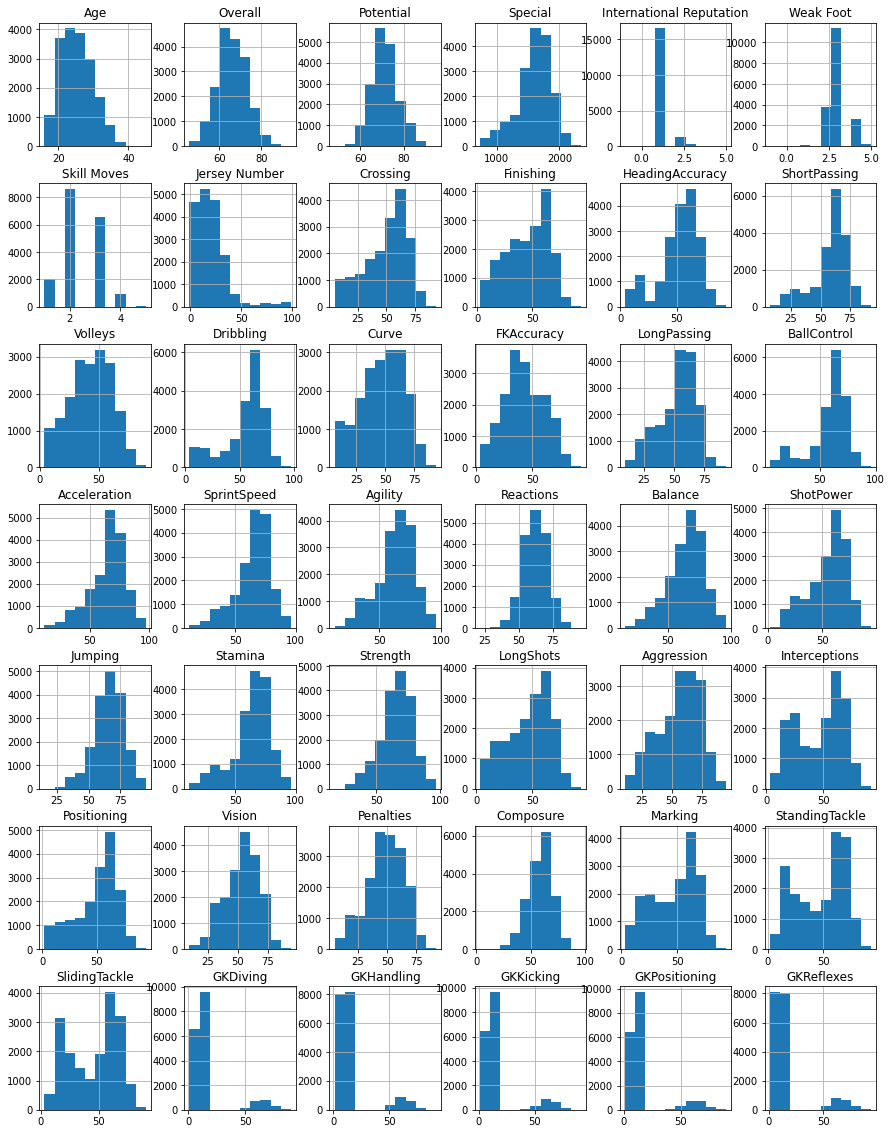

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

-------------------------------------
# Transformations

## Groupe d'âge

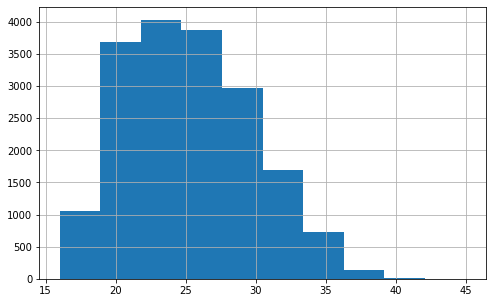

In [5]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["Age"].hist(ax = ax)
fig.savefig("age_hist.png")

In [6]:
def group_age(x):
    if x < 20:
        return '-20'
    elif 20 <= x < 25:
        return '20-25'
    elif 25 <= x < 30:
        return '25-30'
    elif 30 <= x < 35:
        return '30-35'
    elif x >= 35:
        return '+35'
    else:
        print('unkown age', x)
        return -1

In [7]:
data['Age'] = data['Age'].map(group_age)

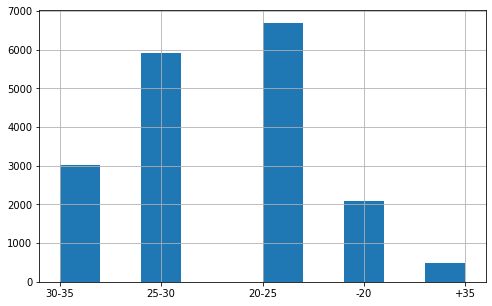

In [13]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["Age"].hist(ax = ax)
fig.savefig("age_hist_groups.png")

## Tailles (cm)

In [8]:
def transform_height(x):
    if x == -1:
        return -1
        
    h_ft, h_inch = str(x).split("'")
    h_ft, h_inch = int(h_ft), int(h_inch)
    
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
        
    return h_cm

In [9]:
data['Height'] = data['Height'].map(transform_height).fillna(0)

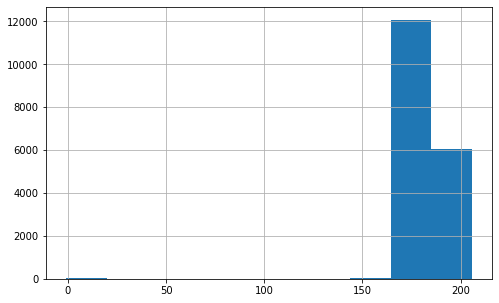

In [16]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["Height"].hist(ax = ax)
fig.savefig("height_hist.png")

## Poids

In [10]:
# fillna 0 for BMI !
data['Weight'] = data['Weight'].str.strip('lbs').fillna(0)
data['Weight'] = data['Weight'].astype(int)

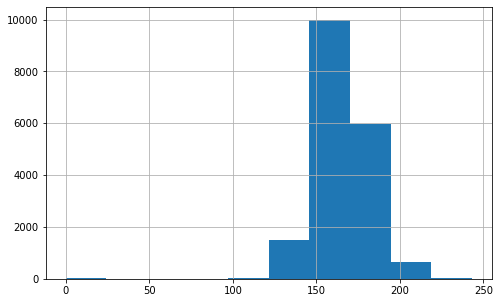

In [18]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["Weight"].hist(ax = ax)
fig.savefig("weight_hist.png")

## BMI: Body Mass Index

In [11]:
data['BMI'] = (data['Weight'] * 0.45359237) /  ((data['Height']/100)**2)

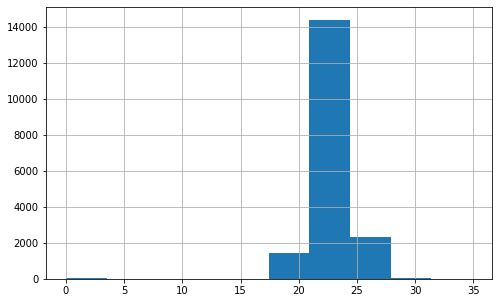

In [20]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["BMI"].hist(ax = ax)
fig.savefig("BMI_hist.png")

## Currency

In [12]:
def transform_currency(x):
    if x == -1:
        return -1
        
    # remove symbol
    if str(x[0]) != '€':
        print('error', x)        
    x = x[1:]

    if x[-1] == 'K':
        x = float(x[:-1]) * 1000
    elif x[-1] == 'M':
        x = float(x[:-1]) * 1000000
        
    return x

In [13]:
data['Value'] = data['Value'].map(transform_currency).astype(float)
data['Wage'] = data['Wage'].map(transform_currency).astype(float)
data['Release Clause'] = data['Release Clause'].map(transform_currency).astype(float)

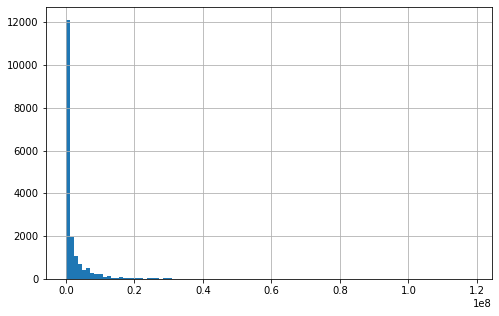

In [23]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["Value"].hist(ax = ax, bins=100)
fig.savefig("value_hist_bin100.png")

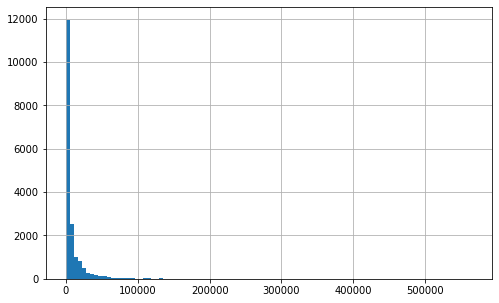

In [24]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["Wage"].hist(ax = ax, bins=100)
fig.savefig("Wage_hist_bin100.png")

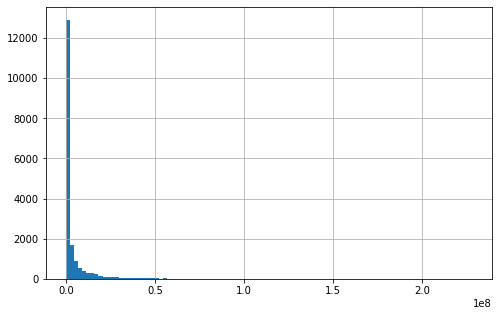

In [25]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["Release Clause"].hist(ax = ax, bins=100)
fig.savefig("Release_Clause_hist_bin100.png")

## Position groups

In [26]:
data['Position'].value_counts()

ST         2152
GK         2025
CB         1778
CM         1394
LB         1322
RB         1291
RM         1124
LM         1095
CAM         958
CDM         948
RCB         662
LCB         648
LCM         395
RCM         391
LW          381
RW          370
RDM         248
LDM         243
LS          207
RS          203
RWB          87
LWB          78
CF           74
Unknown      60
LAM          21
RAM          21
RF           16
LF           15
Name: Position, dtype: int64

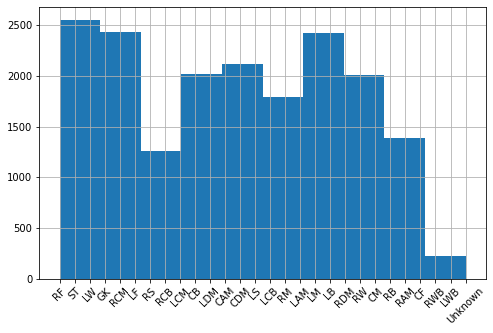

In [27]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
plt.xticks(rotation=45)
data["Position"].hist(ax = ax)
fig.savefig("Position_hist.png")

In [14]:
# https://pxilok.ru/threads/fifa-20-positions-ids.593/
def_pos = [
    'SW', 'RWB', 'RB', 'RCB', 'CB', 'LCB', 'LB', 'LWB',
    'DEF'
]
mid_pos = [
    'RDM', 'CDM', 'LDM', 'RM', 'RCM', 'CM', 'LCM', 'LM', 
    'RAM', 'CAM', 'LAM',
    'MID'
]
fwd_pos = [
    'RF', 'CF', 'LF', 'RW', 'RS', 'ST', 'LS', 'LW',
    'FWD'
]


def transform_position(x):
    if x in def_pos:
        return 'DEF'
    elif x in mid_pos:
        return 'MID'
    elif x in fwd_pos:
        return 'FWD'
    elif x == 'GK':
        return 'GK'
    else:
        return 'unknown'

In [15]:
data['NPosition'] = data['Position'].map(transform_position)

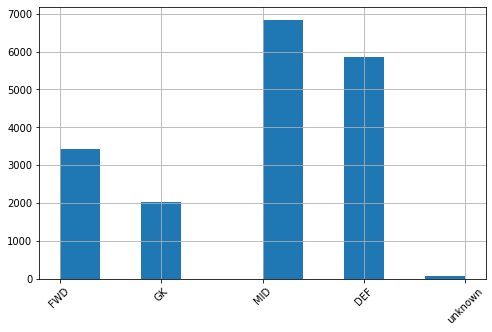

In [30]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
plt.xticks(rotation=45)
data["NPosition"].hist(ax = ax)
fig.savefig("NPosition_hist.png")

## Stats

In [16]:
stat_col = [
    'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
    'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
    'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'
]

# remove value stat+value in stat col
def clean_stat(x):
    if len(str(x)) > 0:
        #print(x, str(x).split('+')[0])
        return str(x).split('+')[0]

In [17]:
tmp = pd.DataFrame()
for col in stat_col:
    data[col] = data[col].fillna(-1).map(clean_stat).astype(int)
    tmp[col] = data[col]

<ipython-input-33-2f969bc3678e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data[stat_col].hist(ax = ax)


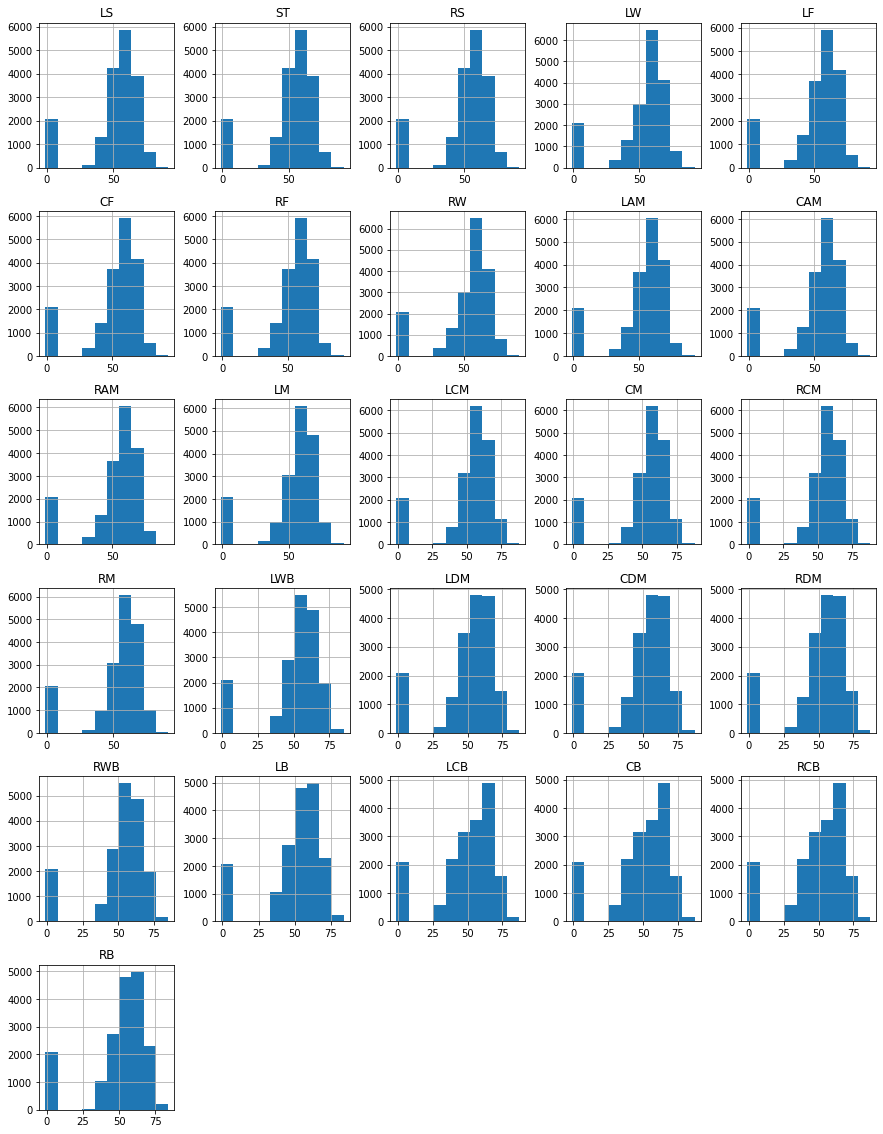

In [33]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data[stat_col].hist(ax = ax)
fig.savefig("stats.png")

## Discrétisation

### Wage

In [34]:
data['Wage'] = data['Wage'].astype(int)
data['Wage'].value_counts()

1000      4900
2000      2827
3000      1857
4000      1255
5000       869
          ... 
380000       1
255000       1
405000       1
455000       1
190000       1
Name: Wage, Length: 144, dtype: int64

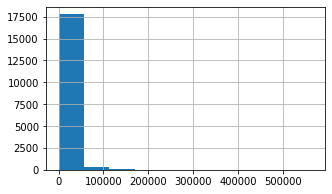

In [35]:
fig = plt.figure(figsize = (5,3))
ax = fig.gca()
data['Wage'].hist()
fig.savefig("Wage_hist.png")

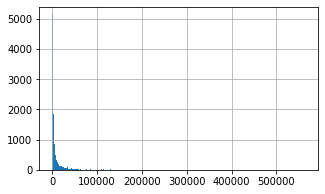

In [36]:
fig = plt.figure(figsize = (5,3))
ax = fig.gca()
data['Wage'].hist(bins=500)
fig.savefig("Wage_hist_bin500.png")

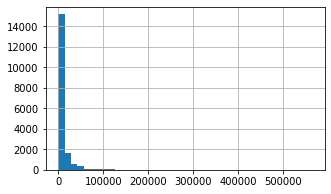

In [37]:
fig = plt.figure(figsize = (5,3))
ax = fig.gca()
data['Wage'].hist(bins=40)
fig.savefig("Wage_hist_bin40.png")

In [38]:
data['Wage'].min(), data['Wage'].max()

(0, 565000)

In [39]:
wage_itrvl = [-1, 0, 100e1, 200e1, 300e1, 400e1, 500e1, 1000e1]
wage_itrvl += [2000e1, 9000e1]
wage_itrvl += [10000e1,60000e1]

In [40]:
data["DWage"] = pd.cut(data['Wage'].values, wage_itrvl)
data["DWage"].value_counts()

(0.0, 1000.0]           4900
(1000.0, 2000.0]        2827
(5000.0, 10000.0]       2240
(20000.0, 90000.0]      1916
(10000.0, 20000.0]      1876
(2000.0, 3000.0]        1857
(3000.0, 4000.0]        1255
(4000.0, 5000.0]         869
(-1.0, 0.0]              241
(100000.0, 600000.0]     185
(90000.0, 100000.0]       41
Name: DWage, dtype: int64

In [41]:
data["DWage"]

0        (100000.0, 600000.0]
1        (100000.0, 600000.0]
2        (100000.0, 600000.0]
3        (100000.0, 600000.0]
4        (100000.0, 600000.0]
                 ...         
18202           (0.0, 1000.0]
18203           (0.0, 1000.0]
18204           (0.0, 1000.0]
18205           (0.0, 1000.0]
18206           (0.0, 1000.0]
Name: DWage, Length: 18207, dtype: category
Categories (11, interval[float64]): [(-1.0, 0.0] < (0.0, 1000.0] < (1000.0, 2000.0] < (2000.0, 3000.0] ... (10000.0, 20000.0] < (20000.0, 90000.0] < (90000.0, 100000.0] < (100000.0, 600000.0]]

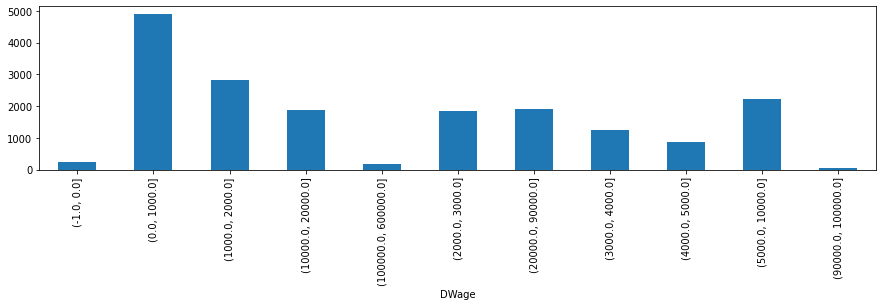

In [42]:
data["DWage"] = data["DWage"].astype(str)
tmp = data.groupby('DWage').DWage.count()
fig = plt.figure(figsize = (15,3))
ax = fig.gca()
tmp.plot(kind="bar")
fig.savefig("DWage_hist_bar.png")

### Value

In [43]:
data['Value'] = data['Value'].astype(int)
data['Value'].value_counts()

1100000      431
375000       372
425000       354
325000       351
450000       343
            ... 
102000000      1
51500000       1
110500000      1
59000000       1
56500000       1
Name: Value, Length: 217, dtype: int64

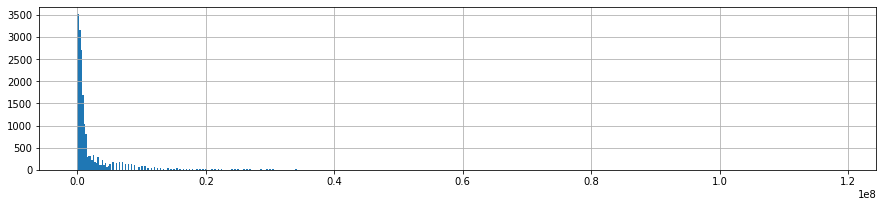

In [44]:
fig = plt.figure(figsize = (15,3))
ax = fig.gca()
data['Value'].hist(bins=500)
fig.savefig("Value_hist_bin500.png")

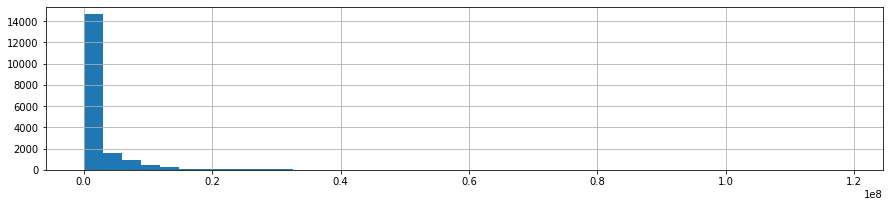

In [45]:
fig = plt.figure(figsize = (15,3))
ax = fig.gca()
data['Value'].hist(bins=40)
fig.savefig("Value_hist_bin40.png")

In [46]:
data['Value'].min(), data['Value'].max()

(0, 118500000)

In [47]:
value_itrvl = [-1, 0, 1000e1]
#value_itrvl += [2000e1, 5000e1, 6000e1, 7000e1, 8000e1, 9000e1]
value_itrvl += [10000e1, 11000e1, 12000e1, 14000e1, 15000e1, 16000e1, 17000e1, 18000e1, 19000e1, 20000e1]
value_itrvl += [25000e1, 30000e1, 35000e1, 40000e1, 45000e1, 50000e1, 55000e1, 60000e1, 70000e1, 80000e1, 90000e1]
value_itrvl += [100000e1, 120000e1, 130000e1, 140000e1, 150000e1] 
value_itrvl += [200000e1, 250000e1, 300000e1, 400000e1, 500000e1, 600000e1, 700000e1]
value_itrvl += [800000e1, 900000e1, 1000000e1, 1100000e1, 1200000e1]

In [48]:
data["DValue"] = pd.cut(data['Value'].values, value_itrvl)
data["DValue"].value_counts()

(10000.0, 100000.0]         953
(600000.0, 700000.0]        936
(700000.0, 800000.0]        804
(250000.0, 300000.0]        797
(900000.0, 1000000.0]       758
(1000000.0, 1200000.0]      755
(800000.0, 900000.0]        747
(200000.0, 250000.0]        742
(3000000.0, 4000000.0]      719
(400000.0, 450000.0]        697
(350000.0, 400000.0]        695
(300000.0, 350000.0]        676
(1500000.0, 2000000.0]      672
(500000.0, 550000.0]        623
(2000000.0, 2500000.0]      593
(450000.0, 500000.0]        590
(550000.0, 600000.0]        554
(4000000.0, 5000000.0]      551
(2500000.0, 3000000.0]      414
(120000.0, 140000.0]        401
(5000000.0, 6000000.0]      347
(6000000.0, 7000000.0]      338
(1200000.0, 1300000.0]      260
(7000000.0, 8000000.0]      260
(-1.0, 0.0]                 252
(8000000.0, 9000000.0]      235
(1300000.0, 1400000.0]      221
(150000.0, 160000.0]        206
(170000.0, 180000.0]        202
(110000.0, 120000.0]        193
(190000.0, 200000.0]        177
(140000.

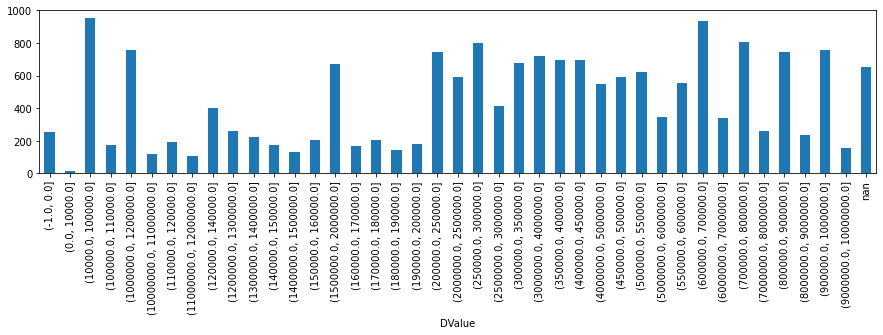

In [49]:
data["DValue"] = data["DValue"].astype(str)
tmp = data.groupby('DValue').DValue.count()
fig = plt.figure(figsize = (15,3))
ax = fig.gca()
tmp.plot(kind="bar")
fig.savefig("DValue_hist_bar.png")

# Analyse

## Visualisation

/opt/anaconda/envs/SD/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


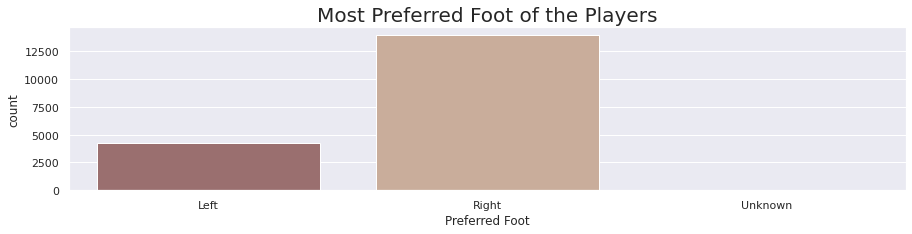

In [65]:
fig = plt.figure(figsize = (15,3))
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()
fig.savefig("prefered_foot.png")

In [53]:
topwage= data[['Name','Value', 'Wage']].nlargest(10,'Wage', keep = 'first')
topwage = topwage.set_index('Name')
topwage

Value    Wage
Name                                
L. Messi           110500000  565000
L. Suárez           80000000  455000
L. Modrić           67000000  420000
Cristiano Ronaldo   77000000  405000
Sergio Ramos        51000000  380000
K. De Bruyne       102000000  355000
T. Kroos            76500000  355000
G. Bale             60000000  355000
E. Hazard           93000000  340000
Coutinho            69500000  340000

Text(0, 0.5, 'Wage')

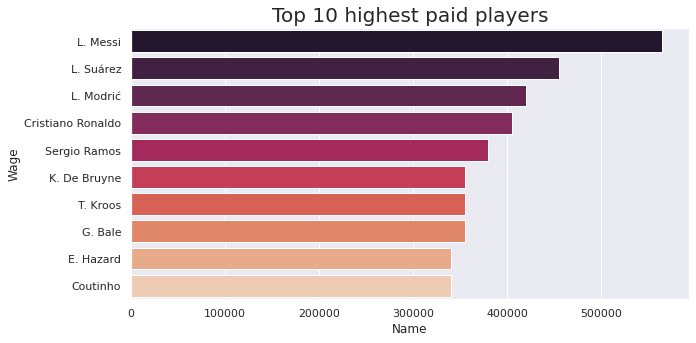

In [54]:
fig = plt.figure(figsize = (15,3))
sns.set()
sns.barplot(x = topwage['Wage'], y =topwage.index,  palette = 'rocket')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)
fig.savefig("top10_paied.png")

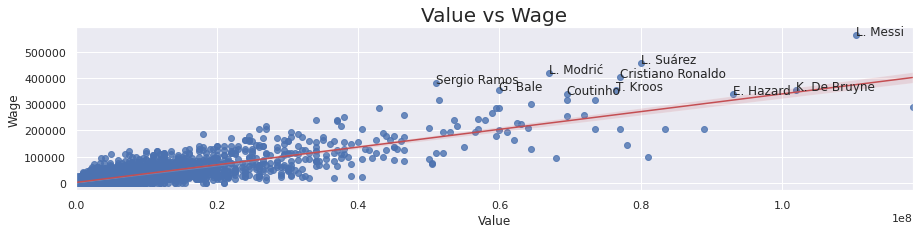

In [66]:
fig = plt.figure(figsize = (15,3))
labels = topwage.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = data,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

# labeling the top 10 highest paid players
for i, label in enumerate(labels):
    ax.annotate(label, (topwage['Value'][i],topwage['Wage'][i]))
fig.savefig("value_vs_worth.png")

In [57]:
nation_value = data[['Value']].groupby(data['Nationality']).apply(np.sum)
top_nation_value = nation_value.nlargest(10,'Value', keep = 'first')
top_nation_value

Value
Nationality            
Spain        4706849997
Brazil       3806374994
France       3363354997
Germany      3030109999
Argentina    2883159997
England      2490914996
Italy        2139395000
Portugal     1630500000
Netherlands  1300180000
Belgium      1221915000

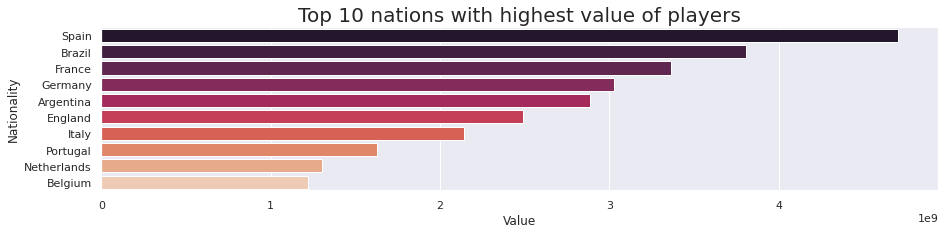

In [70]:
fig = plt.figure(figsize = (15,3))
sns.set()
sns.barplot(x= 'Value', y = top_nation_value.index, data = top_nation_value,  palette = 'rocket')
plt.title('Top 10 nations with highest value of players', fontsize = 20)
fig.savefig("top10_nations.png")

In [59]:
club_value = data[['Value']].groupby(data['Club']).apply(np.sum)
top_club_value = club_value.nlargest(10,'Value', keep = 'first')
top_club_value

Value
Club                          
Real Madrid          874425000
FC Barcelona         852600000
Manchester City      786555000
Juventus             704475000
FC Bayern München    679025000
Atlético Madrid      644525000
Paris Saint-Germain  625325000
Tottenham Hotspur    618450000
Chelsea              606815000
Manchester United    588850000

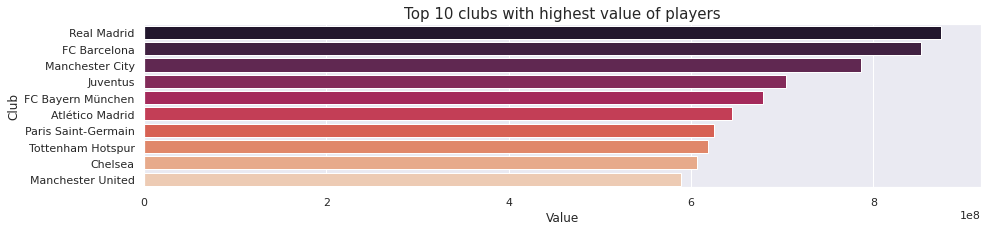

In [68]:
fig = plt.figure(figsize = (15,3))
sns.barplot(x= 'Value', y = top_club_value.index, data = top_club_value, palette = 'rocket')
plt.title('Top 10 clubs with highest value of players', fontsize = 15)
fig.savefig("top10_club.png")

## Correlation

<ipython-input-239-ee4388012352>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


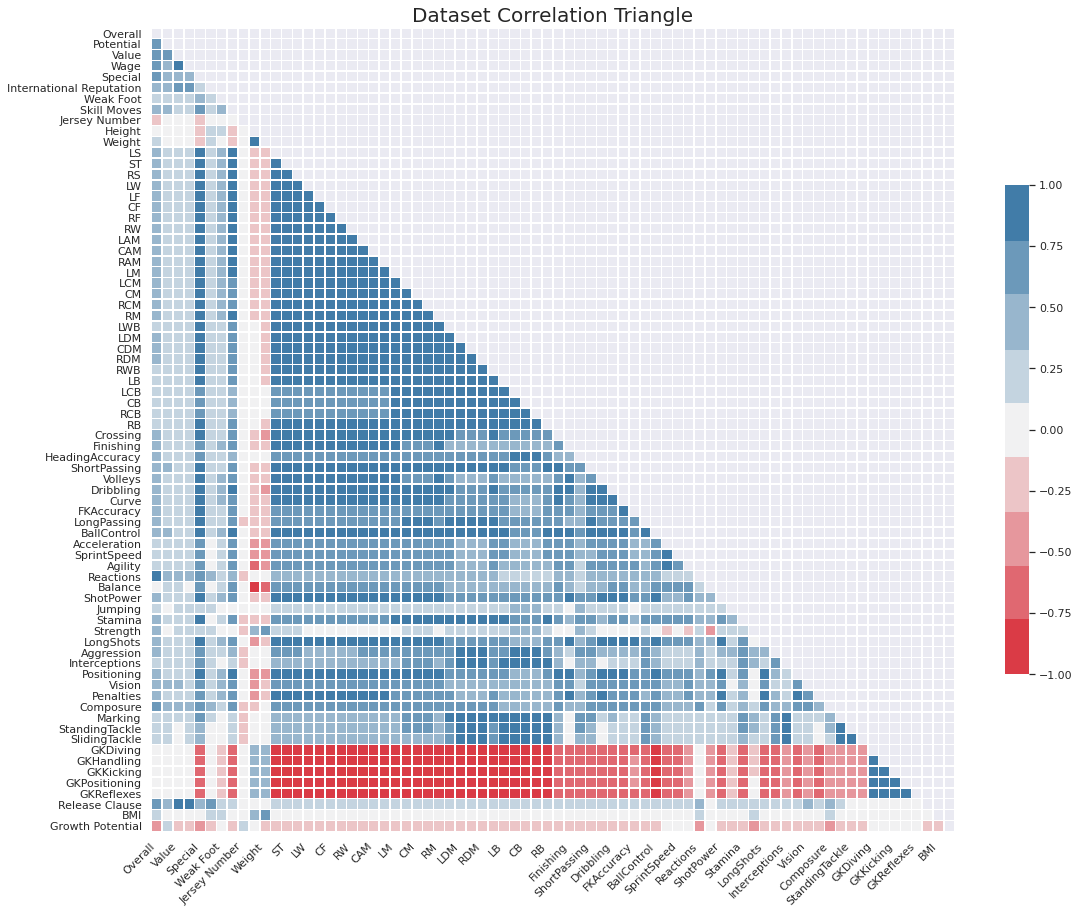

In [239]:
corr = data.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (18, 18))
cmap = sns.diverging_palette(10, 240, n=9)
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
                square = True, linewidths = .5, cbar_kws = {"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_title("Dataset Correlation Triangle", fontsize = 20)
fig.savefig("correlation.png")

## Equipes

In [18]:
nb_def = 4
nb_mid = 4
nb_fwd = 2

## La plus chère

### Goal

In [25]:
data.groupby(['NPosition'], as_index=False).get_group("GK").sort_values(by='Value', ascending=False)[:1][['Name', 'NPosition', 'Overall', 'Nationality', 'Value']]

Name NPosition  Overall Nationality       Value
3  De Gea        GK       91       Spain  72000000.0

### Def

In [28]:
data.groupby(['NPosition'], as_index=False).get_group("DEF").sort_values(by='Value', ascending=False)[:nb_def][['Name', 'NPosition', 'Overall', 'Nationality', 'Value']]

Name NPosition  Overall Nationality       Value
42     S. Umtiti       DEF       87      France  57000000.0
8   Sergio Ramos       DEF       91       Spain  51000000.0
44  K. Koulibaly       DEF       87     Senegal  51000000.0
62     R. Varane       DEF       86      France  50000000.0

### MID

In [31]:
data.groupby(['NPosition'], as_index=False).get_group("MID").sort_values(by='Value', ascending=False)[:nb_mid][['Name', 'NPosition', 'Overall', 'Nationality', 'Value']]

Name NPosition  Overall Nationality        Value
4   K. De Bruyne       MID       91     Belgium  102000000.0
25     K. Mbappé       MID       88      France   81000000.0
17  A. Griezmann       MID       89      France   78000000.0
11      T. Kroos       MID       90     Germany   76500000.0

### FWD

In [33]:
data.groupby(['NPosition'], as_index=False).get_group("FWD").sort_values(by='Value', ascending=False)[:nb_fwd][['Name', 'NPosition', 'Overall', 'Nationality', 'Value']]

Name NPosition  Overall Nationality        Value
2  Neymar Jr       FWD       92      Brazil  118500000.0
0   L. Messi       FWD       94   Argentina  110500000.0

## La plus forte

### Goal

In [36]:
data.groupby(['NPosition'], as_index=False).get_group("GK").sort_values(by='Overall', ascending=False)[:1][['Name', 'NPosition', 'Overall', 'Nationality', 'Value']]

Name NPosition  Overall Nationality       Value
3  De Gea        GK       91       Spain  72000000.0

### DEF

In [107]:
data.groupby(['NPosition'], as_index=False).get_group("DEF").sort_values(by='Overall', ascending=False)[:nb_def][['Name', 'NPosition', 'Overall', 'Nationality', 'Value']]

Name    Age Nationality  Overall  Potential               Club  \
8   Sergio Ramos  30-35       Spain       91         91        Real Madrid   
12      D. Godín  30-35     Uruguay       90         90    Atlético Madrid   
24  G. Chiellini  30-35       Italy       89         89           Juventus   
34    M. Hummels  25-30     Germany       88         88  FC Bayern München   

       Value    Wage  Special Preferred Foot  International Reputation  \
8   51000000  380000     2201          Right                       4.0   
12  44000000  125000     1946          Right                       3.0   
24  27000000  215000     1841           Left                       4.0   
34  46000000  160000     2038          Right                       4.0   

    Weak Foot  Skill Moves     Work Rate Body Type Position  Jersey Number  \
8         3.0          3.0  High/ Medium    Normal      RCB           15.0   
12        3.0          2.0  Medium/ High      Lean       CB           10.0   
24        3.0          2.0  Medium/ High    Normal      LCB            3.0   
34        3.0          3.0  High/ Medium    Normal      LCB            5.0   

         Joined Loaned From Contract Valid Until  Height  Weight  LS  ST  RS  \
8   Aug 1, 2005          -1                 2020   182.9     181  73  73  73   
12  Aug 4, 2010          -1                 2019   188.0     172  64  64  64   
24  Jul 1, 2005          -1                 2020   188.0     187  58  58  58   
34  Jul 1, 2016          -1                 2021   190.5     203  69  69  69   

    LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  \
8   70  71  71  71  70   71   71   71  72   75  75   75  72   81   84   84   
12  61  62  62  62  61   62   62   62  63   68  68   68  63   76   81   81   
24  54  55  55  55  54   54   54   54  56   60  60   60  56   74   76   76   
34  68  69  69  69  68   71   71   71  70   77  77   77  70   78   83   83   

    RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  \
8    84   81  84   87  87   87  84      66.0       60.0             91.0   
12   81   76  79   87  87   87  79      55.0       42.0             92.0   
24   76   74  77   86  86   86  77      58.0       33.0             83.0   
34   83   78  80   85  85   85  80      64.0       55.0             87.0   

    ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  \
8           78.0     66.0       63.0   74.0        72.0         77.0   
12          79.0     47.0       53.0   49.0        51.0         70.0   
24          59.0     45.0       58.0   60.0        31.0         59.0   
34          81.0     60.0       68.0   65.0        53.0         85.0   

    BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  \
8          84.0          76.0         75.0     78.0       85.0     66.0   
12         76.0          68.0         68.0     58.0       85.0     54.0   
24         57.0          63.0         75.0     54.0       82.0     55.0   
34         81.0          53.0         64.0     63.0       87.0     60.0   

    ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
8        79.0     93.0     84.0      83.0       59.0        88.0   
12       67.0     91.0     66.0      88.0       43.0        89.0   
24       78.0     89.0     65.0      89.0       49.0        92.0   
34       71.0     68.0     66.0      84.0       51.0        69.0   

    Interceptions  Positioning  Vision  Penalties  Composure  Marking  \
8            90.0         60.0    63.0       75.0       82.0     87.0   
12           88.0         48.0    52.0       50.0       82.0     90.0   
24           88.0         28.0    50.0       50.0       84.0     93.0   
34           92.0         56.0    79.0       68.0       91.0     88.0   

    StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
8             92.0           91.0      11.0         8.0        9.0   
12            89.0           89.0       6.0         8.0       15.0   
24            93.0           90.

### MID

In [108]:
data.groupby(['NPosition'], as_index=False).get_group("MID").sort_values(by='Overall', ascending=False)[:nb_mid][['Name', 'NPosition', 'Overall', 'Nationality', 'Value']]

Name    Age Nationality  Overall  Potential             Club  \
4   K. De Bruyne  25-30     Belgium       91         92  Manchester City   
6      L. Modrić  30-35     Croatia       91         91      Real Madrid   
11      T. Kroos  25-30     Germany       90         90      Real Madrid   
13   David Silva  30-35       Spain       90         90  Manchester City   

        Value    Wage  Special Preferred Foot  International Reputation  \
4   102000000  355000     2281          Right                       4.0   
6    67000000  420000     2280          Right                       4.0   
11   76500000  355000     2190          Right                       4.0   
13   60000000  285000     2115           Left                       4.0   

    Weak Foot  Skill Moves       Work Rate Body Type Position  Jersey Number  \
4         5.0          4.0      High/ High    Normal      RCM            7.0   
6         4.0          4.0      High/ High      Lean      RCM           10.0   
11        5.0          3.0  Medium/ Medium    Normal      LCM            8.0   
13        2.0          4.0    High/ Medium    Normal      LCM           21.0   

          Joined Loaned From Contract Valid Until  Height  Weight  LS  ST  RS  \
4   Aug 30, 2015          -1                 2023   180.3     154  82  82  82   
6    Aug 1, 2012          -1                 2020   172.7     146  77  77  77   
11  Jul 17, 2014          -1                 2022   182.9     168  78  78  78   
13  Jul 14, 2010          -1                 2020   172.7     148  77  77  77   

    LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  \
4   87  87  87  87  87   88   88   88  88   87  87   87  88   77   77   77   
6   85  84  84  84  85   87   87   87  86   88  88   88  86   82   81   81   
11  81  82  82  82  81   84   84   84  82   86  86   86  82   79   82   82   
13  85  84  84  84  85   87   87   87  85   85  85   85  85   69   70   70   

    RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  \
4    77   77  73   66  66   66  73      93.0       82.0             55.0   
6    81   82  79   71  71   71  79      86.0       72.0             55.0   
11   82   79  77   72  72   72  77      88.0       76.0             54.0   
13   70   69  64   57  57   57  64      84.0       76.0             54.0   

    ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  \
4           92.0     82.0       86.0   85.0        83.0         91.0   
6           93.0     76.0       90.0   85.0        78.0         88.0   
11          92.0     82.0       81.0   86.0        84.0         93.0   
13          93.0     82.0       89.0   82.0        77.0         87.0   

    BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  \
4          91.0          78.0         76.0     79.0       91.0     77.0   
6          93.0          80.0         72.0     93.0       90.0     94.0   
11         90.0          64.0         62.0     70.0       89.0     71.0   
13         94.0          70.0         64.0     92.0       90.0     90.0   

    ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
4        91.0     63.0     90.0      75.0       91.0        76.0   
6        79.0     68.0     89.0      58.0       82.0        62.0   
11       87.0     30.0     75.0      73.0       92.0        60.0   
13       72.0     64.0     78.0      52.0       75.0        57.0   

    Interceptions  Positioning  Vision  Penalties  Composure  Marking  \
4            61.0         87.0    94.0       79.0       88.0     68.0   
6            83.0         79.0    92.0       82.0       84.0     60.0   
11           82.0         79.0    86.0       73.0       85.0     72.0   
13           50.0         89.0    92.0       75.0       93.0     59.0   

    StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
4             58.0           51.0      15.0        13.0        5.0   
6             76.0           73.0      13.0         9.0        7.0   
11            79.0    

### FWD

In [109]:
data.groupby(['NPosition'], as_index=False).get_group("FWD").sort_values(by='Overall', ascending=False)[:nb_fwd][['Name', 'NPosition', 'Overall', 'Nationality', 'Value']]

Name    Age Nationality  Overall  Potential          Club  \
0           L. Messi  30-35   Argentina       94         94  FC Barcelona   
1  Cristiano Ronaldo  30-35    Portugal       94         94      Juventus   

       Value    Wage  Special Preferred Foot  International Reputation  \
0  110500000  565000     2202           Left                       5.0   
1   77000000  405000     2228          Right                       5.0   

   Weak Foot  Skill Moves       Work Rate   Body Type Position  Jersey Number  \
0        4.0          4.0  Medium/ Medium       Messi       RF           10.0   
1        4.0          5.0       High/ Low  C. Ronaldo       ST            7.0   

         Joined Loaned From Contract Valid Until  Height  Weight  LS  ST  RS  \
0   Jul 1, 2004          -1                 2021   170.2     159  88  88  88   
1  Jul 10, 2018          -1                 2022   188.0     183  91  91  91   

   LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  \
0  92  93  93  93  92   93   93   93  91   84  84   84  91   64   61   61   
1  89  90  90  90  89   88   88   88  88   81  81   81  88   65   61   61   

   RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  \
0   61   64  59   47  47   47  59      84.0       95.0             70.0   
1   61   65  61   53  53   53  61      84.0       94.0             89.0   

   ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  \
0          90.0     86.0       97.0   93.0        94.0         87.0   
1          81.0     87.0       88.0   81.0        76.0         77.0   

   BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  \
0         96.0          91.0         86.0     91.0       95.0     95.0   
1         94.0          89.0         91.0     87.0       96.0     70.0   

   ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0       85.0     68.0     72.0      59.0       94.0        48.0   
1       95.0     95.0     88.0      79.0       93.0        63.0   

   Interceptions  Positioning  Vision  Penalties  Composure  Marking  \
0           22.0         94.0    94.0       75.0       96.0     33.0   
1           29.0         95.0    82.0       85.0       95.0     28.0   

   StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0            28.0           26.0       6.0        11.0       15.0   
1            31.0           23.0       7.0        11.0       15.0   

   GKPositioning  GKReflexes  Release Clause        BMI NPosition  \
0           14.0         8.0     226500000.0  24.896813       FWD   
1           14.0        11.0     127100000.0  23.485571       FWD   

                  DWage DValue  Growth Potential  
0  (100000.0, 600000.0]    nan                 0  
1  (100000.0, 600000.0]    nan                 0

# Segmentation

In [226]:
data_seg = data.copy()

In [229]:
data_gk = data_seg[data_seg["NPosition"]=="GK"]
data_seg = data_seg.drop(data_gk.index)
players_name = data_seg.Name
data_seg

Name    Age Nationality  Overall  Potential  \
0                L. Messi  30-35   Argentina       94         94   
1       Cristiano Ronaldo  30-35    Portugal       94         94   
2               Neymar Jr  25-30      Brazil       92         93   
4            K. De Bruyne  25-30     Belgium       91         92   
5               E. Hazard  25-30     Belgium       91         91   
...                   ...    ...         ...      ...        ...   
18202        J. Lundstram    -20     England       47         65   
18203  N. Christoffersson    -20      Sweden       47         63   
18204           B. Worman    -20     England       47         67   
18205      D. Walker-Rice    -20     England       47         66   
18206           G. Nugent    -20     England       46         66   

                      Club      Value    Wage  Special Preferred Foot  \
0             FC Barcelona  110500000  565000     2202           Left   
1                 Juventus   77000000  405000     2228          Right   
2      Paris Saint-Germain  118500000  290000     2143          Right   
4          Manchester City  102000000  355000     2281          Right   
5                  Chelsea   93000000  340000     2142          Right   
...                    ...        ...     ...      ...            ...   
18202      Crewe Alexandra      60000    1000     1307          Right   
18203       Trelleborgs FF      60000    1000     1098          Right   
18204     Cambridge United      60000    1000     1189          Right   
18205      Tranmere Rovers      60000    1000     1228          Right   
18206      Tranmere Rovers      60000    1000     1321          Right   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
0                           5.0        4.0          4.0  Medium/ Medium   
1                           5.0        4.0          5.0       High/ Low   
2                           5.0        5.0          5.0    High/ Medium   
4                           4.0        5.0          4.0      High/ High   
5                           4.0        4.0          4.0    High/ Medium   
...                         ...        ...          ...             ...   
18202                       1.0        2.0          2.0  Medium/ Medium   
18203                       1.0        2.0          2.0  Medium/ Medium   
18204                       1.0        3.0          2.0  Medium/ Medium   
18205                       1.0        3.0          2.0  Medium/ Medium   
18206                       1.0        3.0          2.0  Medium/ Medium   

        Body Type Position  Jersey Number        Joined Loaned From  \
0           Messi       RF           10.0   Jul 1, 2004          -1   
1      C. Ronaldo       ST            7.0  Jul 10, 2018          -1   
2          Neymar       LW           10.0   Aug 3, 2017          -1   
4          Normal      RCM            7.0  Aug 30, 2015          -1   
5          Normal       LF           10.0   Jul 1, 2012          -1   
...           ...      ...            ...           ...         ...   
18202        Lean       CM           22.0   May 3, 2017          -1   
18203      Normal       ST           21.0  Mar 19, 2018          -1   
18204      Normal       ST           33.0   Jul 1, 2017          -1   
18205        Lean       RW           34.0  Apr 24, 2018          -1   
18206        Lean       CM           33.0  Oct 30, 2018          -1   

      Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  \
0                     2021   170.2     159  88  88  88  92  93  93  93  92   
1                     2022   188.0     183  91  91  91  89  90  90  90  89   
2                     2022   175.3     150  84  84  84  89  89  89  89  89   
4                     2023   180.3     154  82  82  82  87  87  87  87  87   
5                     2020   172.7     163  83  83  83  89  88  88  88  89   
...                    ...     ...     ...  ..  ..  ..  ..  ..  ..  ..  ..   
18202                 2019 

In [209]:
drops = [
    'Overall','Age', 'Name', 'Nationality',
    'Club','Preferred Foot','Work Rate',
    'Body Type','Position', 'Joined', 'Loaned From',
    'Contract Valid Until',
    'NPosition',
    'Value','Wage', 'DWage','DValue',
    'LS','GKHandling' ,'GKDiving','GKKicking','GKPositioning'
    ,'GKReflexes','LS','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM'
    ,'LM','LCM','RCM','RM','LWB','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

data_seg = data_seg.drop(drops, axis=1)
data_seg

Potential  Special  International Reputation  Weak Foot  Skill Moves  \
0             94     2202                       5.0        4.0          4.0   
1             94     2228                       5.0        4.0          5.0   
2             93     2143                       5.0        5.0          5.0   
4             92     2281                       4.0        5.0          4.0   
5             91     2142                       4.0        4.0          4.0   
...          ...      ...                       ...        ...          ...   
18202         65     1307                       1.0        2.0          2.0   
18203         63     1098                       1.0        2.0          2.0   
18204         67     1189                       1.0        3.0          2.0   
18205         66     1228                       1.0        3.0          2.0   
18206         66     1321                       1.0        3.0          2.0   

       Jersey Number  Height  Weight  ST  CM  LDM  Crossing  Finishing  \
0               10.0   170.2     159  88  84   61      84.0       95.0   
1                7.0   188.0     183  91  81   61      84.0       94.0   
2               10.0   175.3     150  84  81   60      79.0       87.0   
4                7.0   180.3     154  82  87   77      93.0       82.0   
5               10.0   172.7     163  83  82   63      81.0       84.0   
...              ...     ...     ...  ..  ..  ...       ...        ...   
18202           22.0   175.3     134  42  45   45      34.0       38.0   
18203           21.0   190.5     170  45  35   31      23.0       52.0   
18204           33.0   172.7     148  45  38   30      25.0       40.0   
18205           34.0   177.8     154  47  39   32      44.0       50.0   
18206           33.0   177.8     176  43  45   46      41.0       34.0   

       HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0                 70.0          90.0     86.0       97.0   93.0        94.0   
1                 89.0          81.0     87.0       88.0   81.0        76.0   
2                 62.0          84.0     84.0       96.0   88.0        87.0   
4                 55.0          92.0     82.0       86.0   85.0        83.0   
5                 61.0          89.0     80.0       95.0   83.0        79.0   
...                ...           ...      ...        ...    ...         ...   
18202             40.0          49.0     25.0       42.0   30.0        34.0   
18203             52.0          43.0     36.0       39.0   32.0        20.0   
18204             46.0          38.0     38.0       45.0   38.0        27.0   
18205             39.0          42.0     40.0       51.0   34.0        32.0   
18206             46.0          48.0     30.0       43.0   40.0        34.0   

       LongPassing  BallControl  Acceleration  SprintSpeed  Agility  \
0             87.0         96.0          91.0         86.0     91.0   
1             77.0         94.0          89.0         91.0     87.0   
2             78.0         95.0          94.0         90.0     96.0   
4             91.0         91.0          78.0         76.0     79.0   
5             83.0         94.0          94.0         88.0     95.0   
...            ...          ...           ...          ...      ...   
18202         45.0         43.0          54.0         57.0     60.0   
18203         25.0         40.0          41.0         39.0     38.0   
18204         28.0         44.0          70.0         69.0     50.0   
18205         32.0         52.0          61.0         60.0     52.0   
18206         44.0         51.0          57.0         55.0     55.0   

       Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  \
0           95.0     95.0       85.0     68.0     72.0      59.0       94.0   
1           96.0     70.0       95.0     95.0     88.0      79.0       93.0   
2           94.0     84.0       80.0     61.0     81.0      49.0       82.0   
4           91.0     77.0       91.0     63.0     9

In [215]:
for col in data_seg.columns:
    data_seg[col].fillna(data_seg[col].mean(), inplace = True)

data_seg.isnull().sum(), data_seg.shape

(Potential                   0
 Special                     0
 International Reputation    0
 Weak Foot                   0
 Skill Moves                 0
 Jersey Number               0
 Height                      0
 Weight                      0
 ST                          0
 CM                          0
 LDM                         0
 Crossing                    0
 Finishing                   0
 HeadingAccuracy             0
 ShortPassing                0
 Volleys                     0
 Dribbling                   0
 Curve                       0
 FKAccuracy                  0
 LongPassing                 0
 BallControl                 0
 Acceleration                0
 SprintSpeed                 0
 Agility                     0
 Reactions                   0
 Balance                     0
 ShotPower                   0
 Jumping                     0
 Stamina                     0
 Strength                    0
 LongShots                   0
 Aggression                  0
 Interce

### Normalisation

In [211]:
data_seg_scaled = StandardScaler().fit_transform(data_seg)
data_seg_scaled.shape

(16182, 43)

### PCA

In [216]:
PCA_2 = PCA(n_components=2)
princp_comp_2 = PCA_2.fit_transform(data_seg_scaled)
df_princp_comp_2 = pd.DataFrame(data = princp_comp_2, columns=['PC1', 'PC2'])
df_princp_comp_2

PC1       PC2
0      16.915386  0.669216
1      15.132085  1.650265
2      16.116994  0.258651
3      15.208665  4.303767
4      14.687300  0.353317
...          ...       ...
16177  -6.293955 -2.935603
16178  -8.526084 -4.136579
16179  -6.402051 -6.196306
16180  -6.063666 -6.082889
16181  -6.107810 -1.505680

[16182 rows x 2 columns]

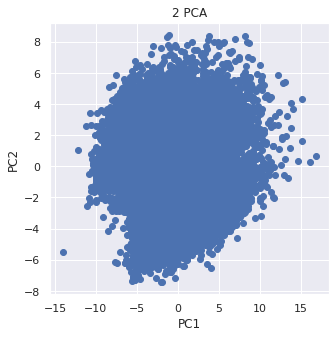

In [243]:
fig = plt.figure(figsize = (5,5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 PCA')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'])
plt.show()
fig.savefig("PCA2.png")

### Jambu Elbow

In [174]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(df_princp_comp_2).score(df_princp_comp_2) for i in range(len(kmeans))]

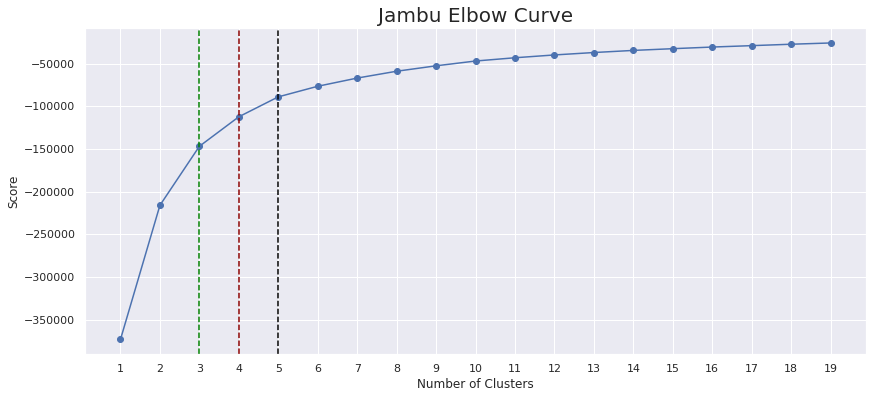

In [244]:
# Plot the results
fig, ax0 = plt.subplots(figsize = (14, 6))
plt.plot(Nc, score, marker='o')
plt.axvline(x = 4, color = "#8b0000", linestyle = "--")
plt.axvline(x = 3, color = "green", linestyle = "--")
plt.axvline(x = 5, color = "black", linestyle = "--")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Number of Clusters", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.title("Jambu Elbow Curve", fontsize = 20)
plt.show()
fig.savefig("elbow_curve.png")

In [248]:
K=5

kmeans = KMeans(n_clusters=K)
kmeans = kmeans.fit(df_princp_comp_2)
labels = kmeans.predict(df_princp_comp_2)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

tmp = df_princp_comp_2.copy()
tmp['name'] = players_name
tmp

PC1       PC2  cluster               name
0      16.915386  0.669216        0           L. Messi
1      15.132085  1.650265        0  Cristiano Ronaldo
2      16.116994  0.258651        0          Neymar Jr
3      15.208665  4.303767        0                NaN
4      14.687300  0.353317        0       K. De Bruyne
...          ...       ...      ...                ...
16177  -6.293955 -2.935603        3            G. Shaw
16178  -8.526084 -4.136579        1          P. Camará
16179  -6.402051 -6.196306        3           Y. Maeda
16180  -6.063666 -6.082889        3          C. Galvin
16181  -6.107810 -1.505680        1                NaN

[16182 rows x 4 columns]

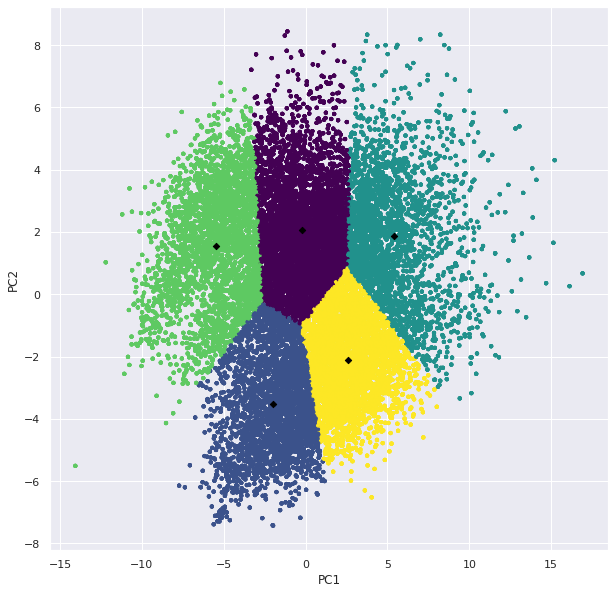

In [252]:
fig = plt.figure(figsize = (10,10))
for i in range(K):
    plt.scatter(df_princp_comp_2["PC1"], df_princp_comp_2["PC2"], c=clusters,s=10, cmap='viridis')
plt.scatter(centroid[:,0], centroid[:,1], s=20, color="black", marker="D")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
fig.savefig("kmeans_5.png")

In [253]:
K=4

kmeans = KMeans(n_clusters=K)
kmeans = kmeans.fit(df_princp_comp_2)
labels = kmeans.predict(df_princp_comp_2)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

tmp = df_princp_comp_2.copy()
tmp['name'] = players_name
tmp

PC1       PC2  cluster               name
0      16.915386  0.669216        0           L. Messi
1      15.132085  1.650265        0  Cristiano Ronaldo
2      16.116994  0.258651        0          Neymar Jr
3      15.208665  4.303767        0                NaN
4      14.687300  0.353317        0       K. De Bruyne
...          ...       ...      ...                ...
16177  -6.293955 -2.935603        3            G. Shaw
16178  -8.526084 -4.136579        1          P. Camará
16179  -6.402051 -6.196306        3           Y. Maeda
16180  -6.063666 -6.082889        3          C. Galvin
16181  -6.107810 -1.505680        1                NaN

[16182 rows x 4 columns]

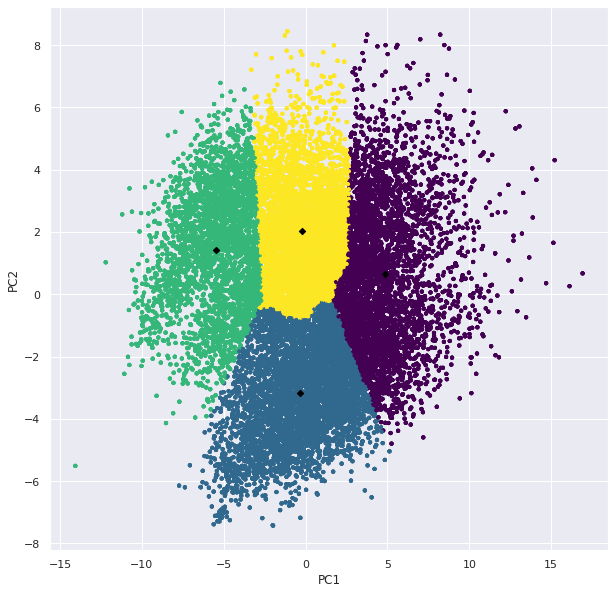

In [254]:
fig = plt.figure(figsize = (10,10))
for i in range(K):
    plt.scatter(df_princp_comp_2["PC1"], df_princp_comp_2["PC2"], c=clusters,s=10, cmap='viridis')
plt.scatter(centroid[:,0], centroid[:,1], s=20, color="black", marker="D")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
fig.savefig("kmeans_4.png")

In [255]:
K=3

kmeans = KMeans(n_clusters=K)
kmeans = kmeans.fit(df_princp_comp_2)
labels = kmeans.predict(df_princp_comp_2)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

tmp = df_princp_comp_2.copy()
tmp['name'] = players_name
tmp

PC1       PC2  cluster               name
0      16.915386  0.669216        0           L. Messi
1      15.132085  1.650265        0  Cristiano Ronaldo
2      16.116994  0.258651        0          Neymar Jr
3      15.208665  4.303767        0                NaN
4      14.687300  0.353317        0       K. De Bruyne
...          ...       ...      ...                ...
16177  -6.293955 -2.935603        3            G. Shaw
16178  -8.526084 -4.136579        1          P. Camará
16179  -6.402051 -6.196306        3           Y. Maeda
16180  -6.063666 -6.082889        3          C. Galvin
16181  -6.107810 -1.505680        1                NaN

[16182 rows x 4 columns]

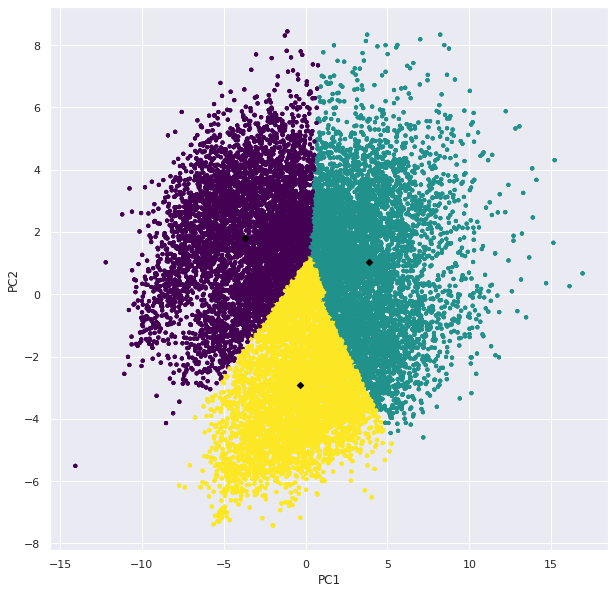

In [256]:
fig = plt.figure(figsize = (10,10))
for i in range(K):
    plt.scatter(df_princp_comp_2["PC1"], df_princp_comp_2["PC2"], c=clusters,s=10, cmap='viridis')
plt.scatter(centroid[:,0], centroid[:,1], s=20, color="black", marker="D")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
fig.savefig("kmeans_3.png")

### K.Mbappé remplacent

In [259]:
tmp_pca2 = df_princp_comp_2.copy()
tmp_pca2['name'] = players_name

mbappe_pc1 = tmp_pca2[tmp_pca2["name"]=='K. Mbappé']["PC1"]
mbappe_pc2 = tmp_pca2[tmp_pca2["name"]=='K. Mbappé']["PC2"]

# distance
a = (tmp_pca2["PC1"]- mbappe_pc1)**2
b = (tmp_pca2["PC2"] - mbappe_pc2)**2
dist = np.sqrt(a+b)
idx = np.argpartition(dist,2)

remplacant = data_seg.iloc[idx[1]] 
remplacants_clustering_infos = tmp_pca2.iloc[idx[1:5]]
remplacants_clustering_infos

PC1       PC2  cluster               name
1  15.132085  1.650265        0  Cristiano Ronaldo
2  16.116994  0.258651        0          Neymar Jr
3  15.208665  4.303767        0                NaN
4  14.687300  0.353317        0       K. De Bruyne

## Clustering Algo

In [267]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

### Spectral Clustering

/opt/anaconda/envs/SD/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
<ipython-input-271-6879dcbc3ace>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


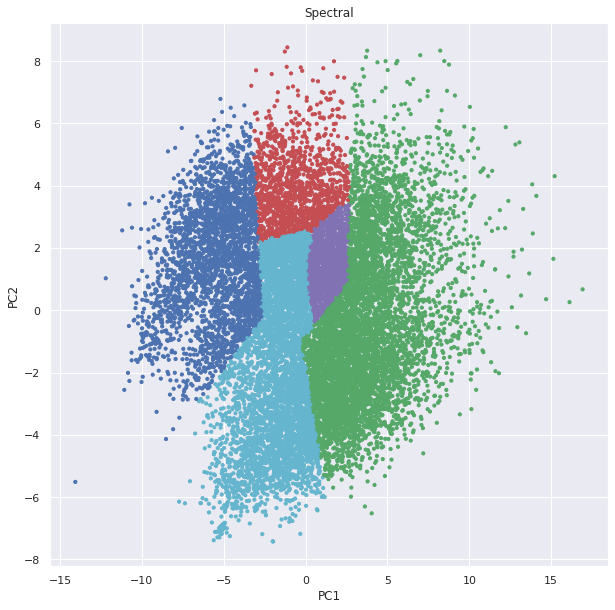

In [271]:
K = 5

clf = cluster.SpectralClustering(n_clusters = K, eigen_solver='arpack', affinity="nearest_neighbors")
clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
plt.show()
fig.savefig("spectral_clustering_5.png")

/opt/anaconda/envs/SD/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
<ipython-input-270-1b18971246e5>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


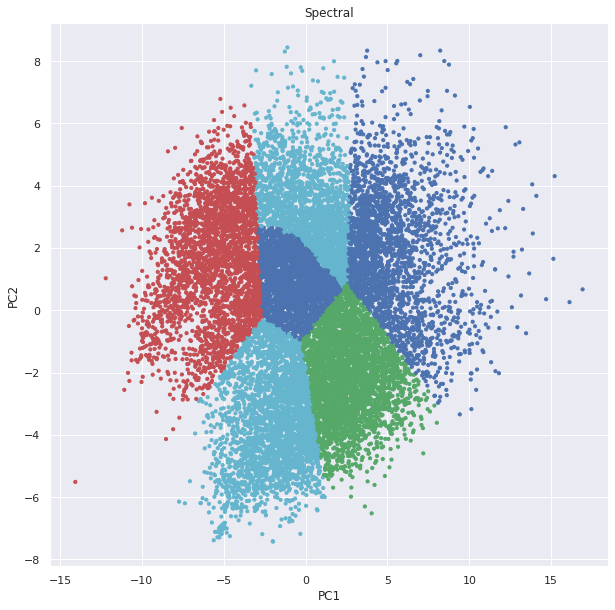

In [270]:
K = 4

clf = cluster.SpectralClustering(n_clusters = K, eigen_solver='arpack', affinity="nearest_neighbors")
clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
plt.show()
fig.savefig("spectral_clustering_4.png")

/opt/anaconda/envs/SD/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
<ipython-input-272-16e57b78fe77>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


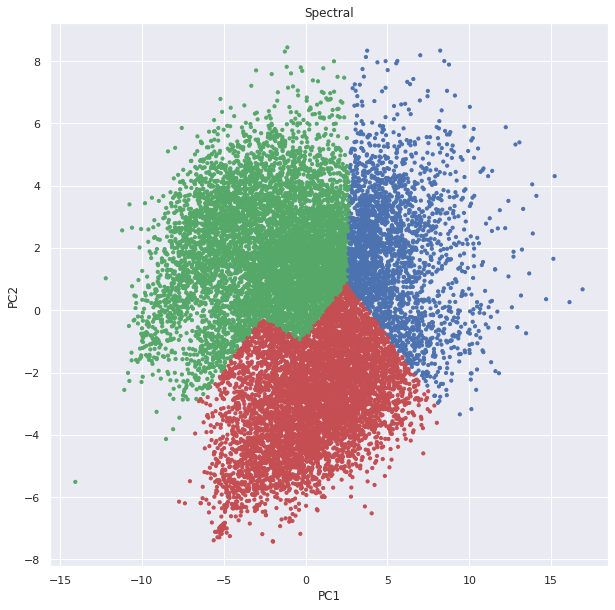

In [272]:
K = 3

clf = cluster.SpectralClustering(n_clusters = K, eigen_solver='arpack', affinity="nearest_neighbors")
clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("spectral_clustering_3.png")

### DBSCAN

<ipython-input-281-9af2cf1ccce5>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


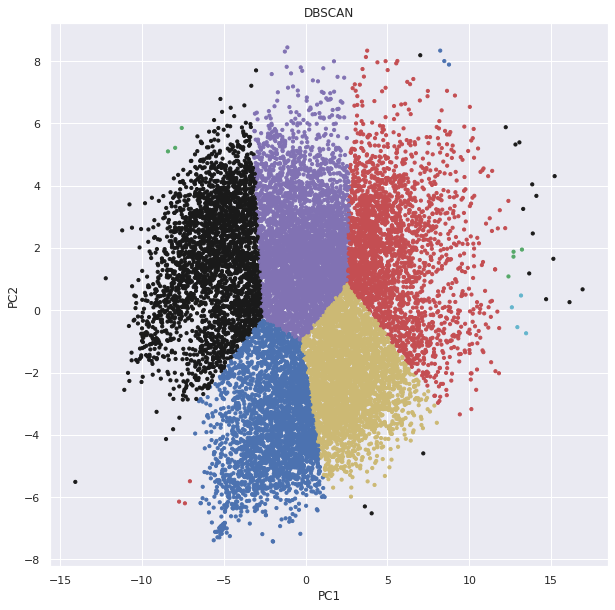

In [281]:
K = 3
clf = cluster.DBSCAN(eps=0.8, min_samples=K, metric='euclidean', leaf_size=30)

clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("DBSCAN_min_samples_3.png")

<ipython-input-282-3dcb6254b2aa>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


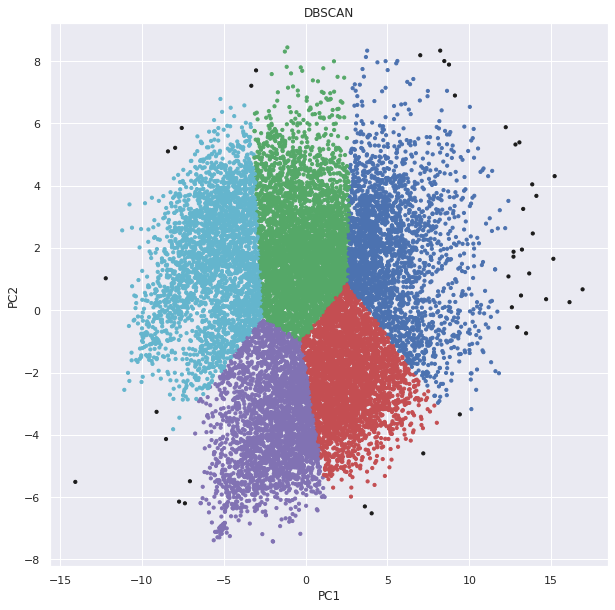

In [282]:
K = 5
clf = cluster.DBSCAN(eps=0.8, min_samples=K, metric='euclidean', leaf_size=30)

clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("DBSCAN_min_samples_5.png")

### MiniBatchKMeans

<ipython-input-283-2465be6d2b8e>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


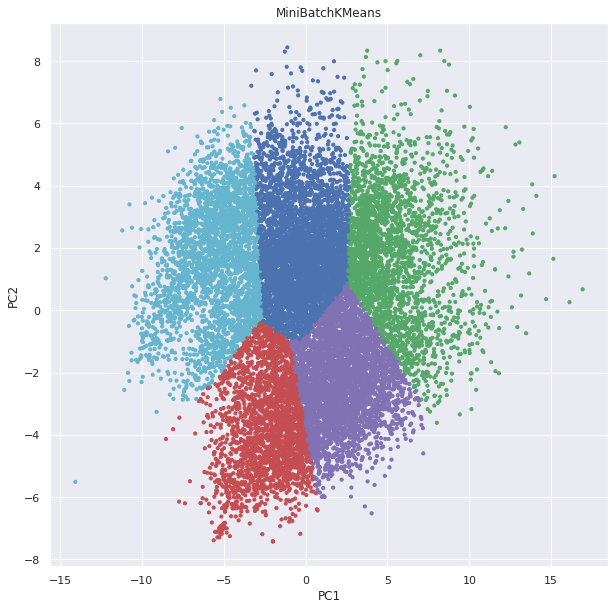

In [283]:
K = 5
clf = cluster.MiniBatchKMeans(n_clusters = K)

clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('MiniBatchKMeans')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("MiniBatchKMeans_5.png")

<ipython-input-285-7b2fff1c843a>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


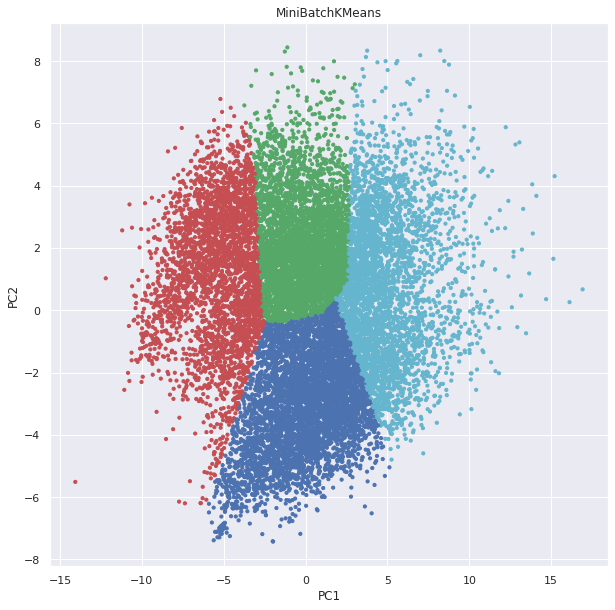

In [285]:
K = 4
clf = cluster.MiniBatchKMeans(n_clusters = K)

clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('MiniBatchKMeans')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("MiniBatchKMeans_4.png")

<ipython-input-284-216d10ab0075>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


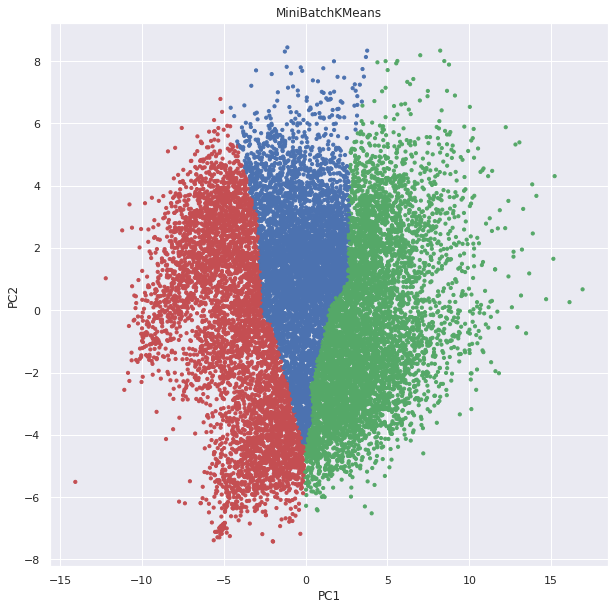

In [284]:
K = 3
clf = cluster.MiniBatchKMeans(n_clusters = K)

clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('MiniBatchKMeans')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("MiniBatchKMeans_3.png")

### Birch

<ipython-input-286-1d2b59a45188>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


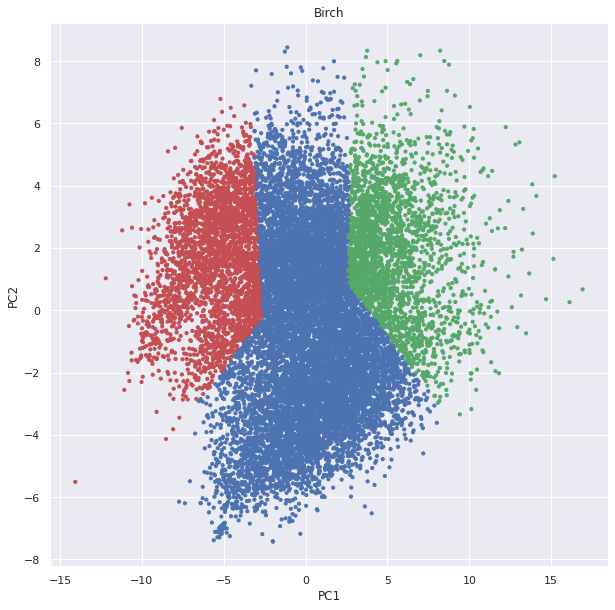

In [286]:
K = 3
clf = cluster.Birch(n_clusters=K)

clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Birch')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("Birch_3.png")

<ipython-input-287-551a30232fc3>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


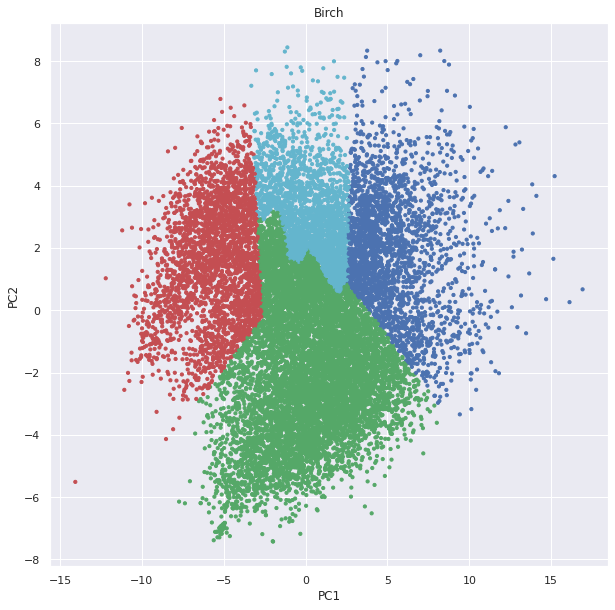

In [287]:
K = 4
clf = cluster.Birch(n_clusters=K)

clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Birch')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("Birch_4.png")

<ipython-input-288-b841a76acc6c>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = clf.labels_.astype(np.int)


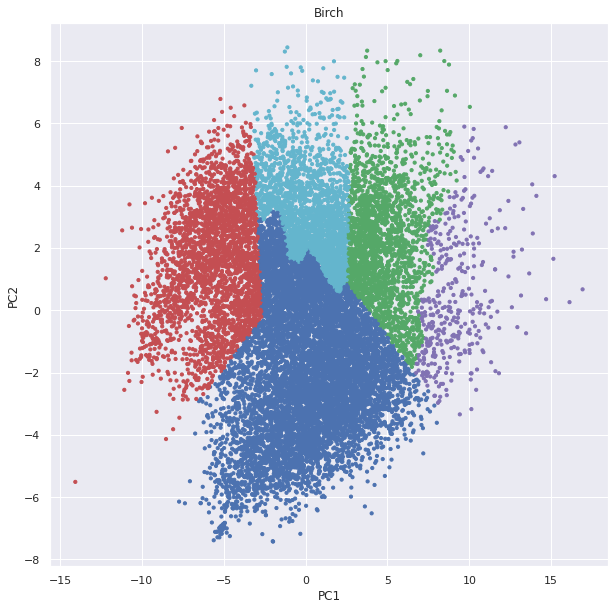

In [288]:
K = 5
clf = cluster.Birch(n_clusters=K)

clf.fit(df_princp_comp_2)
y_pred = clf.labels_.astype(np.int)

fig = plt.figure(figsize = (10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Birch')
plt.scatter(df_princp_comp_2['PC1'], df_princp_comp_2['PC2'], color=colors[y_pred].tolist(), s=10)
fig.savefig("Birch_5.png")